In [9]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms
from going_modular import data_setup, engine, utils



try:
  from torchinfo import summary
except:
  !pip install -q torchinfo
  from torchinfo import summary

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [11]:
image_path = utils.download_data(source='https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip',
                                 destination='pizza_steak_sushi')

image_path

PosixPath('data/pizza_steak_sushi')

In [12]:
train_dir = image_path / 'train'
test_dir = image_path / 'test'

In [13]:
IMG_SIZE = 224

manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

manual_transforms

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
)

In [14]:
BATCH_SIZE = 32

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms,
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f396446bc40>,
 ['pizza', 'steak', 'sushi'])

In [15]:
image_batch, label_batch = next(iter(train_dataloader))

image, label = image_batch[0], label_batch[0]

image.shape, label

(torch.Size([3, 224, 224]), tensor(0))

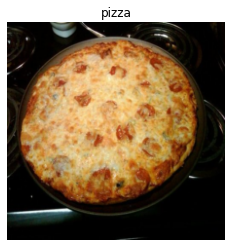

In [16]:
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False);

In [17]:
height = 224
width = 224
c_c = 3
patch_size = 16

number_of_patches = int((height * width) / (patch_size*patch_size))

print(f'Number of patches (N) in image height (H={height}), width (W={width}) and patch size (P={patch_size}): {number_of_patches}')


embedding_layer_input_shape = (height, width, c_c)

embedding_layer_output_shape = (number_of_patches, (patch_size*patch_size) * c_c)

print(f'\nInput shape (single 2D image): {embedding_layer_input_shape}')
print(f'Output shape (single 2D image flattened into patches: {embedding_layer_output_shape}, \n\t(Num of patches, flatten patch size * color channels)' )
print('Input shape (224*224*3) == Output shape (196*768): True')

Number of patches (N) in image height (H=224), width (W=224) and patch size (P=16): 196

Input shape (single 2D image): (224, 224, 3)
Output shape (single 2D image flattened into patches: (196, 768), 
	(Num of patches, flatten patch size * color channels)
Input shape (224*224*3) == Output shape (196*768): True


In [18]:
14*14

196

In [19]:
(224*224)//(16*16)

196

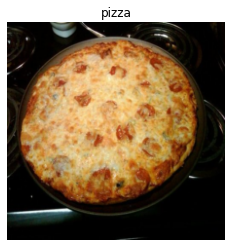

In [20]:
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False);

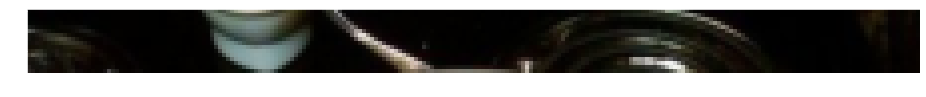

In [21]:
image_permuted = image.permute(1,2,0)

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}

plt.rcParams.update(params)
patch_size = 16
plt.figure(figsize=(patch_size,patch_size))
plt.imshow(image_permuted[:patch_size, :, :]);

Number of patches per row: 14, 
Patch size: 16 pixels x 16 pixels


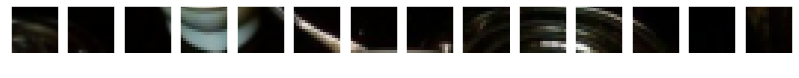

In [22]:
img_size = 224
patch_size = 16
num_patches = img_size//patch_size
assert img_size % patch_size == 0, 'Image size must be divisible by patch size'
print(f'Number of patches per row: {num_patches}, \nPatch size: {patch_size} pixels x {patch_size} pixels')

fig, axs = plt.subplots(nrows=1,
                        ncols=img_size// patch_size,
                        figsize=(num_patches, num_patches),
                        sharex=True,
                        sharey=True)



for i, patch in enumerate(range(0, img_size, patch_size)):
    axs[i].imshow(image_permuted[:patch_size, patch:patch+patch_size, :]);
     # keep height index constant, alter the width index
    axs[i].set_xlabel(i+1)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

In [23]:
# patch_s = 0
# patch_s = patch_s+(patch_size*10)
# print(patch_s, patch_size)

# print(image_permuted[:, :, :].shape)
# print(image_permuted[:patch_size, patch_s:patch_s+patch_size, :].shape)

# image_permuted[:patch_size, patch_s:patch_s+patch_size, :]

# x = [[[1,2,3,4,5,6,7,8,9],[1,1,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9],[1,1,3,4,5,6,7,8,9]],
#      [[2,2,3,4,5,6,7,8,9],[2,1,3,4,5,6,7,8,9],[2,2,3,4,5,6,7,8,9],[2,1,3,4,5,6,7,8,9]],
#      [[3,2,3,4,5,6,7,8,9],[3,2,3,4,5,6,7,8,9],[3,2,3,4,5,6,7,8,9],[3,2,3,4,5,6,7,8,9]]]

# x = torch.FloatTensor(x)
# x.shape, x[:2,3:4,:]

Number of patches per row: 14        
Number of patches per column: 14        
Total patches: 196        
Patch size: 16 pixels x 16 pixels


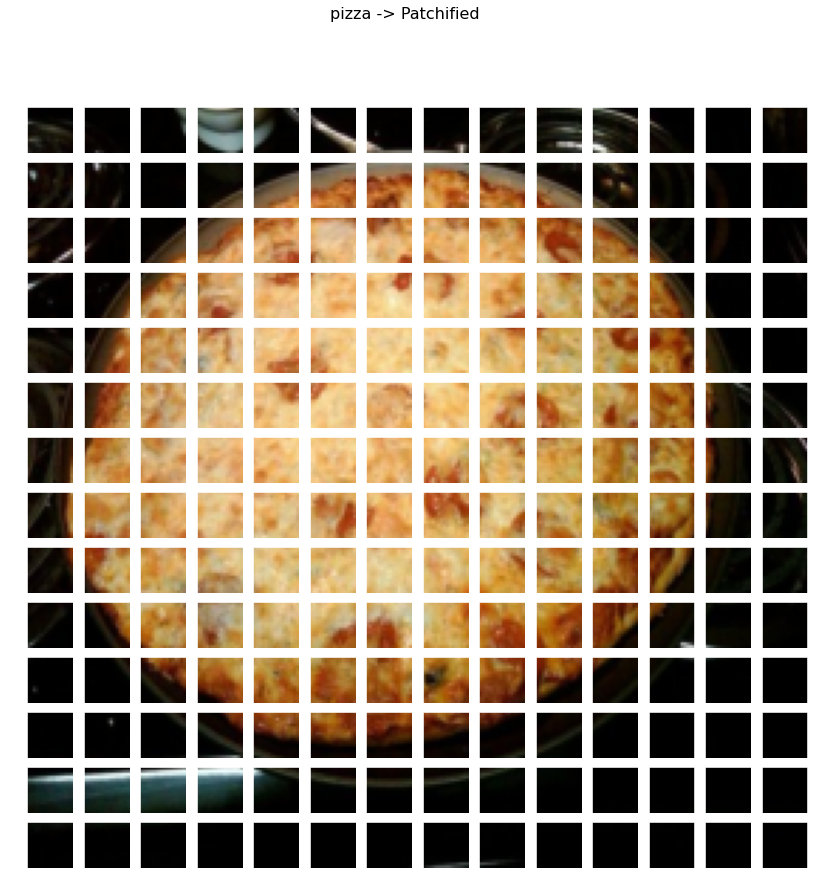

In [24]:
img_size = 224
patch_size = 16
num_patches = img_size//patch_size
assert img_size % patch_size == 0, 'Image size must be divisible by patch size'
print(f'Number of patches per row: {num_patches}\
        \nNumber of patches per column: {num_patches}\
        \nTotal patches: {num_patches*num_patches}\
        \nPatch size: {patch_size} pixels x {patch_size} pixels')

fig, axs = plt.subplots(nrows=img_size // patch_size,
                        ncols=img_size // patch_size,
                        figsize=(num_patches, num_patches),
                        sharex=True,
                        sharey=True)



for i, patch_height in enumerate(range(0, img_size, patch_size)):
    for j, patch_width in enumerate(range(0, img_size, patch_size)):

        axs[i, j].imshow(image_permuted[patch_height:patch_height+patch_size, 
                                        patch_width:patch_width+patch_size,
                                        :]);
         # keep height index constant, alter the width index
            
        axs[i, j].set_ylabel(i+1,
                             rotation='horizontal',
                             horizontalalignment='right',
                             verticalalignment='center')
        axs[i, j].set_xlabel(j+1)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].label_outer()

fig.suptitle(f'{class_names[label]} -> Patchified', fontsize=16)
plt.show()

In [25]:
# X=0
#     # j = 0            j = 2          j = 4
# x = [[[X,1,1],[1,1,1],[X,2,1],[1,2,1],[X,3,1],[1,3,1]], # i = 0
#      [[1,1,1],[1,1,1],[1,2,1],[1,2,1],[1,3,1],[1,3,1]],
#      [[X,2,2],[1,2,2],[X,2,2],[2,2,2],[X,2,3],[2,2,3]], # i = 2
#      [[1,2,2],[1,2,2],[2,2,2],[2,2,2],[2,2,3],[2,2,3]],
#      [[X,3,3],[1,3,3],[X,2,3],[2,2,3],[X,3,3],[3,3,3]], # i = 4
#      [[1,3,3],[1,3,3],[2,2,3],[2,2,3],[3,3,3],[3,3,3]]]

# x = torch.FloatTensor(x)
# img_size_= 2

# for i in (range(0, len(x), img_size_)):
#     for j in (range(0, len(x), img_size_)):

#         print(x[i:i+img_size_, 
#               j:j+img_size_,
#               :])

In [26]:
patch_size = 16

conv2d = nn.Conv2d(in_channels=3,
                   out_channels=768,
                   kernel_size=patch_size,
                   stride=patch_size,
                   padding=0)

In [27]:
image_out_of_conv = conv2d(image.unsqueeze(0))
print(image_out_of_conv.shape)
print('\t(batch_size, embedding_dim (cc x pw x ph), feature_map_height, feature_map_width)')
(224*224*3)==(768*14*14), (196*768)==(((224*224)//(16*16)) * (16*16*3))

torch.Size([1, 768, 14, 14])
	(batch_size, embedding_dim (cc x pw x ph), feature_map_height, feature_map_width)


(True, True)

In [28]:
((224*224)//(16*16)), (16*16*3), (224*224*3)//(16*16*3), (768*14*14)==(224*224*3)

(196, 768, 196, True)

In [29]:
14*14

196

In [30]:
16*16*196 == 224*224, (224*224)*3 == 768*14*14

(True, True)

In [31]:
print(f'Number of elements in original img H x W x CC (224*224*3 = 150528)\
        \nequals number of elements in conv2d(img): \
    \nembedding (cc x pw x ph) x feature_map_height x feature_map_width (768*14*14 = 150528)')

Number of elements in original img H x W x CC (224*224*3 = 150528)        
equals number of elements in conv2d(img):     
embedding (cc x pw x ph) x feature_map_height x feature_map_width (768*14*14 = 150528)


torch.Size([1, 14, 14]) torch.Size([1, 768, 14, 14])


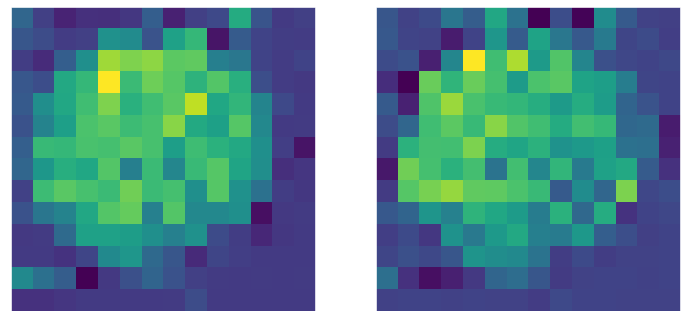

In [32]:
import random 
random_indexes = random.sample(range(0, 768), k=2)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

for i, idx in enumerate(random_indexes):
    image_conv_feature_map = image_out_of_conv[:, idx, :, :]
    axs[i].imshow(image_conv_feature_map.squeeze().detach().numpy())
    axs[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[]);
    
print(image_out_of_conv[:, idx, :, :].size(), image_out_of_conv.size())

In [33]:
16*14

224

In [34]:
single_feature_map = image_out_of_conv[:, :1, :, :]
single_feature_map, single_feature_map.requires_grad

(tensor([[[[-0.0220, -0.0057, -0.0464,  0.2068, -0.0383,  0.0668, -0.2085,
            -0.0718, -0.0746, -0.0208, -0.2100, -0.0359, -0.0069,  0.0042],
           [ 0.0213,  0.0610, -0.0070,  0.0721, -0.0331, -0.1569,  0.0093,
            -0.1515, -0.0304,  0.0297, -0.2018, -0.0185, -0.0048, -0.0144],
           [ 0.0224, -0.0132,  0.0258, -0.0146, -0.1351,  0.0786, -0.1451,
             0.0288, -0.0444, -0.1048,  0.0763, -0.0772, -0.0219,  0.0071],
           [ 0.0024,  0.0069, -0.0871, -0.1305, -0.0137, -0.0530,  0.0596,
            -0.0912, -0.1467,  0.0751, -0.0621,  0.0197, -0.0388, -0.0125],
           [-0.0481, -0.0902, -0.0179, -0.0505, -0.1149,  0.0353, -0.0005,
            -0.0117, -0.0015,  0.0020,  0.0296,  0.0698, -0.0151, -0.0102],
           [ 0.0117, -0.0686,  0.0133, -0.0460,  0.0450, -0.0722, -0.0111,
            -0.0270, -0.1073, -0.0484, -0.0917, -0.0026,  0.0046, -0.0024],
           [ 0.0395, -0.1068, -0.0332,  0.0043,  0.0042, -0.0727, -0.0858,
            -0.0303

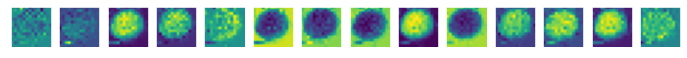

In [35]:
# import random 
random_indexes = range(0, 14)

fig, axs = plt.subplots(nrows=1, ncols=14, figsize=(12, 12))

for i, idx in enumerate(random_indexes):
    image_conv_feature_map = image_out_of_conv[:, idx, :, :]
    axs[i].imshow(image_conv_feature_map.squeeze().detach().numpy())
    axs[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[]);

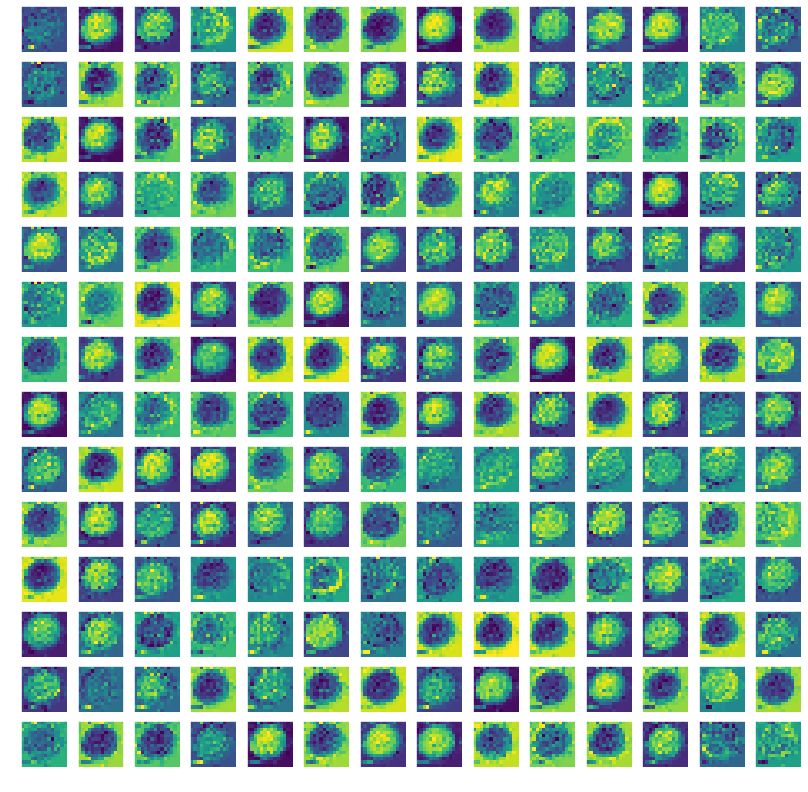

In [36]:
fig, axs = plt.subplots(nrows=14,
                        ncols=14,
                        figsize=(num_patches, num_patches),
                        sharex=True,
                        sharey=True)

j_ = 0
for i in range(0, 14):
    for j in range(14):
        j_ += 1
        image_conv_feature_map = image_out_of_conv[:, j_, :, :]
        axs[i, j].imshow(image_conv_feature_map.squeeze().detach().numpy());
        axs[i, j].set_ylabel(1,
                             rotation='horizontal',
                             horizontalalignment='right',
                             verticalalignment='center')
        axs[i, j].set_xlabel(2)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].label_outer()

torch.Size([3, 224, 224])

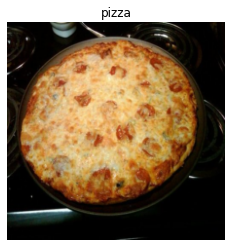

In [37]:
plt.imshow(image.permute(1,2,0)),
plt.title(class_names[label])
plt.axis(False);
image.shape

In [38]:
print(f'Current tensor shape: {image_out_of_conv.shape} -> [batch, embedding_dim, feature_map_height, feature_map_width]')

Current tensor shape: torch.Size([1, 768, 14, 14]) -> [batch, embedding_dim, feature_map_height, feature_map_width]


In [39]:
flatten = nn.Flatten(start_dim=2,
                     end_dim=3)

In [40]:
print(f'Original image shape: {image.shape}')

image_out_of_conv = conv2d(image.unsqueeze(0))
print(f'Image feature map shape: {image_out_of_conv.shape}')

image_out_of_conv_flattened = flatten(image_out_of_conv)
print(f'Flattened image feature map shape: {image_out_of_conv_flattened.shape}')

Original image shape: torch.Size([3, 224, 224])
Image feature map shape: torch.Size([1, 768, 14, 14])
Flattened image feature map shape: torch.Size([1, 768, 196])


In [41]:
image_out_of_conv_flattened_reshaped = image_out_of_conv_flattened.permute(0,2,1)
print(f'Patch embedding sequence shape: {image_out_of_conv_flattened_reshaped.shape} -> [batch_size, num_patches, embedding_shape]')

Patch embedding sequence shape: torch.Size([1, 196, 768]) -> [batch_size, num_patches, embedding_shape]


In [42]:
14*14, 16*16*3

(196, 768)

In [43]:
    #  K = Kernel, P = Patch
    #  K0 K1 K2 K3 K4 K5...K768
a = [[[1, 2, 3, 1, 2, 3,   7 ], #P0
      [2, 2, 3, 1, 2, 3,   8 ], #P1
    #  ...
      [3, 2, 3, 1, 2, 3,   9 ]]]#P196

a = torch.FloatTensor(a)
T = a[:,1,:] # Gets all the values from P1
t = a[:,:,1] # Gets all the values from K1

print(f'a.shape: {a.shape}')
print(f'\nP1: {T}, P1.shape: {T.shape}')
print(f'K1: {t}, K1.shape: {t.shape}')

a.shape: torch.Size([1, 3, 7])

P1: tensor([[2., 2., 3., 1., 2., 3., 8.]]), P1.shape: torch.Size([1, 7])
K1: tensor([[2., 2., 2.]]), K1.shape: torch.Size([1, 3])


torch.Size([1, 196])


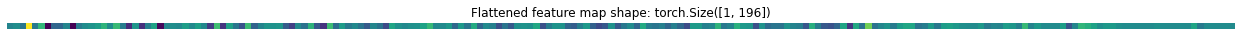

In [44]:
single_out_of_conv_flattened_reshaped = image_out_of_conv_flattened_reshaped[:,:,0]

plt.figure(figsize=(22, 22))
plt.imshow(single_out_of_conv_flattened_reshaped.detach().numpy())
plt.title(f'Flattened feature map shape: {single_out_of_conv_flattened_reshaped.shape}')

plt.axis(False);
print(single_out_of_conv_flattened_reshaped.shape)

<Figure size 432x288 with 0 Axes>

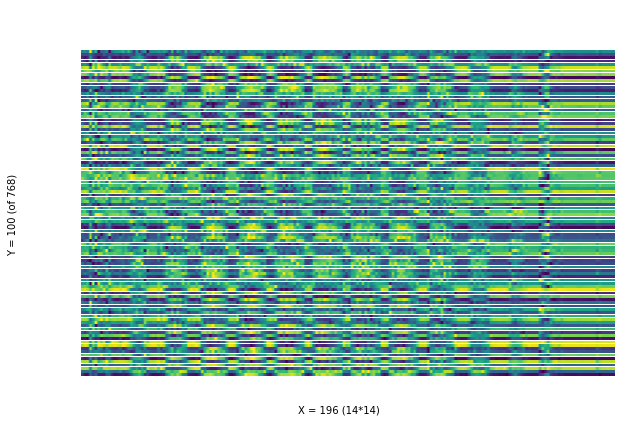

Rows (X) represent the original image after a kernel have patched it to a flat 14*14 with       
one vector value for each patch = 196 patch values in each line       

Columns (Y) represent the vector values for each different kernel       
(768 different lines, one for each kernel output)       
first column values = first patch vector values(1,1), last column values = last vector values(14,14)
torch.Size([1, 196]) torch.Size([1, 196, 768])


In [45]:
t = 100

plt.figure()
fig, axs = plt.subplots(t,1, sharex=True, sharey=True, figsize=(10, 6))
fig.text(0.5, 0.04, 'X = 196 (14*14)', ha='center')
fig.text(0.04, 0.5, f'Y = {t} (of 768)', va='center', rotation='vertical')
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

for i in range(t):
    a = image_out_of_conv_flattened_reshaped[:,:,i]
    axs[i].imshow(a.detach().numpy());
    axs[i].axis(False);
    
fig.suptitle(f'image conv & flat stacked for {t} iterations of 768\n color indicates vector value for specific patch', fontsize=16)
plt.show()
print('Rows (X) represent the original image after a kernel have patched it to a flat 14*14 with\
       \none vector value for each patch = 196 patch values in each line\
       \n\nColumns (Y) represent the vector values for each different kernel\
       \n(768 different lines, one for each kernel output)\
       \nfirst column values = first patch vector values(1,1), last column values = last vector values(14,14)') 
print(image_out_of_conv_flattened_reshaped[:,:,i].shape,image_out_of_conv_flattened_reshaped.shape)

In [46]:
single_out_of_conv_flattened_reshaped, single_out_of_conv_flattened_reshaped.requires_grad, single_out_of_conv_flattened_reshaped.shape

(tensor([[-0.0220, -0.0057, -0.0464,  0.2068, -0.0383,  0.0668, -0.2085, -0.0718,
          -0.0746, -0.0208, -0.2100, -0.0359, -0.0069,  0.0042,  0.0213,  0.0610,
          -0.0070,  0.0721, -0.0331, -0.1569,  0.0093, -0.1515, -0.0304,  0.0297,
          -0.2018, -0.0185, -0.0048, -0.0144,  0.0224, -0.0132,  0.0258, -0.0146,
          -0.1351,  0.0786, -0.1451,  0.0288, -0.0444, -0.1048,  0.0763, -0.0772,
          -0.0219,  0.0071,  0.0024,  0.0069, -0.0871, -0.1305, -0.0137, -0.0530,
           0.0596, -0.0912, -0.1467,  0.0751, -0.0621,  0.0197, -0.0388, -0.0125,
          -0.0481, -0.0902, -0.0179, -0.0505, -0.1149,  0.0353, -0.0005, -0.0117,
          -0.0015,  0.0020,  0.0296,  0.0698, -0.0151, -0.0102,  0.0117, -0.0686,
           0.0133, -0.0460,  0.0450, -0.0722, -0.0111, -0.0270, -0.1073, -0.0484,
          -0.0917, -0.0026,  0.0046, -0.0024,  0.0395, -0.1068, -0.0332,  0.0043,
           0.0042, -0.0727, -0.0858, -0.0303,  0.0145, -0.0803, -0.1168, -0.0946,
           0.001

In [47]:
class PatchEmbedding(nn.Module):
    """ Turns a 2D input image into a 1D sequence learnable embedding vector.
    
    Args:
        in_channels (int): Number of color channels fot the input images. Defaults to 3.
        patch_size (int): Size of patches to convert input image into. Defaults to 16.
        embedding_dim (int): Size of embedding to turn image into. Defaults to 768 """
    
    def __init__(self,
                 in_channels:int=3,
                 patch_size:int=16,
                 embedding_dim:int=768):
        super().__init__()
        
        self.patcher = nn.Conv2d(in_channels=in_channels,
                       out_channels=embedding_dim,
                       kernel_size=patch_size,
                       stride=patch_size,
                       padding=0)
        
        self.flatten = nn.Flatten(start_dim=2,
                                  end_dim=3)
    
    def forward(self, x):
        image_resolution = x.shape[-1]
        assert image_resolution % patch_size == 0, f'Input image size must be divisible by patch size, image shape: {image_resolution}, patch size: {patch_size}'
        
        x_patched = self.patcher(x)
        x_flattened = self.flatten(x_patched)
        
        return x_flattened.permute(0,2,1)
        

In [48]:
utils.set_seeds()

patchify = PatchEmbedding(in_channels=3,
                          patch_size=15,
                          embedding_dim=768)

print(f'Input image shape: {image.unsqueeze(0).shape}')
patch_embedded_image = patchify(image.unsqueeze(0))
print(f'Output patch embedding shape: {patch_embedded_image.shape}')

Input image shape: torch.Size([1, 3, 224, 224])
Output patch embedding shape: torch.Size([1, 196, 768])


In [49]:
patch_embedded_image[:,1,:100],'...'

(tensor([[-0.0412,  0.0297,  0.0021,  0.0393,  0.0038, -0.0386, -0.0385,  0.0138,
           0.0191,  0.0286,  0.0010, -0.0415,  0.0338,  0.0183, -0.0082,  0.0262,
          -0.0050,  0.0406, -0.0094, -0.0212,  0.0297, -0.0529, -0.0420, -0.0253,
          -0.0049, -0.0162,  0.0010, -0.0250,  0.0081, -0.0291, -0.0277, -0.0102,
           0.0335, -0.0015, -0.0138,  0.0300,  0.0238, -0.0296, -0.0008,  0.0168,
           0.0079, -0.0116,  0.0262,  0.0092, -0.0220,  0.0504, -0.0070,  0.0264,
          -0.0163, -0.0258,  0.0102,  0.0044, -0.0135, -0.0028,  0.0011,  0.0333,
           0.0237, -0.0024,  0.0405,  0.0383, -0.0031,  0.0400, -0.0332,  0.0169,
          -0.0422, -0.0148,  0.0312, -0.0282, -0.0104,  0.0203, -0.0245,  0.0246,
          -0.0541,  0.0319,  0.0078, -0.0040,  0.0328, -0.0227, -0.0157,  0.0149,
          -0.0275,  0.0311,  0.0208,  0.0093, -0.0226, -0.0344, -0.0054,  0.0248,
          -0.0104, -0.0347,  0.0167, -0.0320, -0.0212, -0.0082,  0.0194, -0.0100,
          -0.023

In [50]:
random_input_image = (1, 3, 224, 224)
random_input_image_error = (1, 3, 250, 250)

summary(PatchEmbedding(),
        input_size=random_input_image,
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
PatchEmbedding (PatchEmbedding)          [1, 3, 224, 224]     [1, 196, 768]        --                   True
├─Conv2d (patcher)                       [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
├─Flatten (flatten)                      [1, 768, 14, 14]     [1, 768, 196]        --                   --
Total params: 590,592
Trainable params: 590,592
Non-trainable params: 0
Total mult-adds (M): 115.76
Input size (MB): 0.60
Forward/backward pass size (MB): 1.20
Params size (MB): 2.36
Estimated Total Size (MB): 4.17

In [51]:
print('Kx = Different vector values for the different patches.\
            \nFirst row eq first patch(1,1) last row equals last patch(14,14)\
            \nEach row has 768 differnet values (768 outputs with 768 different kernels)\n') 

print('\t  K0\t    K1\t     K2\t\t    K765     K766     K767')
print(patch_embedded_image)
print(f'Patch embedding shape: {patch_embedded_image.shape} -> [batch_size, number_of_patches, embedding_dimension')

Kx = Different vector values for the different patches.            
First row eq first patch(1,1) last row equals last patch(14,14)            
Each row has 768 differnet values (768 outputs with 768 different kernels)

	  K0	    K1	     K2		    K765     K766     K767
tensor([[[-0.1025,  0.0036, -0.0198,  ..., -0.0285,  0.0323, -0.0242],
         [-0.0412,  0.0297,  0.0021,  ...,  0.0011,  0.0108, -0.0307],
         [-0.0316,  0.0092,  0.0131,  ...,  0.0164,  0.0460, -0.0354],
         ...,
         [-0.0196,  0.0154, -0.0052,  ...,  0.0072,  0.0306, -0.0147],
         [-0.0202,  0.0166, -0.0050,  ...,  0.0078,  0.0310, -0.0120],
         [-0.0196,  0.0144, -0.0034,  ...,  0.0061,  0.0309, -0.0132]]],
       grad_fn=<PermuteBackward0>)
Patch embedding shape: torch.Size([1, 196, 768]) -> [batch_size, number_of_patches, embedding_dimension


In [52]:
print(14*14 * (16*16*3) == 224*224*3)

    #  K = Kernel, P = Patch
    #  K0 K1 K2 K3 K4 K5...K768
a = [[[1, 2, 3, 1, 2, 3,   7 ], #P0
      [2, 2, 3, 1, 2, 3,   8 ], #P1
    #  ...
      [3, 2, 3, 1, 2, 3,   9 ]]]#P196

a = torch.FloatTensor(a)
T = a[:,1,:] # Gets all the values from P1
t = a[:,:,1] # Gets all the values from K1

print(f'a.shape: {a.shape}')
print(f'\na[:,1,:], P1: {T}, P1.shape: {T.shape}')
print(f'a[:,:,1], K1: {t}, K1.shape: {t.shape}')

True
a.shape: torch.Size([1, 3, 7])

a[:,1,:], P1: tensor([[2., 2., 3., 1., 2., 3., 8.]]), P1.shape: torch.Size([1, 7])
a[:,:,1], K1: tensor([[2., 2., 2.]]), K1.shape: torch.Size([1, 3])


In [53]:
print('All the patch vector values from kernel 0')
patch_embedded_image[:,:,0], patch_embedded_image[:,:,0].shape

All the patch vector values from kernel 0


(tensor([[-0.1025, -0.0412, -0.0316, -0.3145, -0.3104, -0.2360, -0.1168, -0.0223,
          -0.0457, -0.0994, -0.2088, -0.1990, -0.0413, -0.0290, -0.0754, -0.0824,
          -0.0259, -0.0868, -0.2045, -0.5110, -0.5341, -0.6629, -0.5840, -0.4225,
          -0.2221, -0.0734, -0.0622, -0.0388, -0.1159, -0.0458, -0.0683, -0.4395,
          -0.7210, -0.8606, -0.7722, -0.8493, -0.7224, -0.5319, -0.3593, -0.2601,
          -0.0289, -0.0420, -0.1459, -0.0586, -0.4539, -0.7589, -0.6800, -0.8814,
          -0.9081, -0.8817, -0.7798, -0.8222, -0.7403, -0.5090, -0.1913, -0.0127,
          -0.0906, -0.2731, -0.6494, -0.8247, -0.9173, -0.9048, -0.9540, -0.8904,
          -0.8681, -0.7953, -0.7394, -0.4826, -0.3060, -0.0564, -0.0727, -0.3766,
          -0.6617, -0.7926, -0.8141, -0.7809, -0.9062, -0.9271, -0.9153, -0.7596,
          -0.7102, -0.6135, -0.3714, -0.1298, -0.1367, -0.5583, -0.7898, -0.8838,
          -0.9500, -0.9511, -0.8865, -0.9053, -0.8214, -0.6044, -0.6373, -0.5079,
          -0.328

In [54]:
print('All the patch vector values from kernel 0-6')
patch_embedded_image[:,:,:6],

All the patch vector values from kernel 0-6


(tensor([[[-0.1025,  0.0036, -0.0198,  0.0364, -0.0184, -0.0467],
          [-0.0412,  0.0297,  0.0021,  0.0393,  0.0038, -0.0386],
          [-0.0316,  0.0092,  0.0131,  0.0262,  0.0047, -0.0423],
          ...,
          [-0.0196,  0.0154, -0.0052,  0.0226,  0.0102, -0.0317],
          [-0.0202,  0.0166, -0.0050,  0.0226,  0.0099, -0.0323],
          [-0.0196,  0.0144, -0.0034,  0.0236,  0.0108, -0.0322]]],
        grad_fn=<SliceBackward0>),)

In [55]:
print('The first 100 kernel scalar values for patch 1')
patch_embedded_image[:,1,:200], patch_embedded_image[:,1,:200].shape,

The first 100 kernel scalar values for patch 1


(tensor([[-0.0412,  0.0297,  0.0021,  0.0393,  0.0038, -0.0386, -0.0385,  0.0138,
           0.0191,  0.0286,  0.0010, -0.0415,  0.0338,  0.0183, -0.0082,  0.0262,
          -0.0050,  0.0406, -0.0094, -0.0212,  0.0297, -0.0529, -0.0420, -0.0253,
          -0.0049, -0.0162,  0.0010, -0.0250,  0.0081, -0.0291, -0.0277, -0.0102,
           0.0335, -0.0015, -0.0138,  0.0300,  0.0238, -0.0296, -0.0008,  0.0168,
           0.0079, -0.0116,  0.0262,  0.0092, -0.0220,  0.0504, -0.0070,  0.0264,
          -0.0163, -0.0258,  0.0102,  0.0044, -0.0135, -0.0028,  0.0011,  0.0333,
           0.0237, -0.0024,  0.0405,  0.0383, -0.0031,  0.0400, -0.0332,  0.0169,
          -0.0422, -0.0148,  0.0312, -0.0282, -0.0104,  0.0203, -0.0245,  0.0246,
          -0.0541,  0.0319,  0.0078, -0.0040,  0.0328, -0.0227, -0.0157,  0.0149,
          -0.0275,  0.0311,  0.0208,  0.0093, -0.0226, -0.0344, -0.0054,  0.0248,
          -0.0104, -0.0347,  0.0167, -0.0320, -0.0212, -0.0082,  0.0194, -0.0100,
          -0.023

In [56]:
a = [[[1, 1, 1, 1, 1, 1, 1], 
      [1, 1, 1, 1, 1, 1, 1], 
      [1, 1, 1, 1, 1, 1, 1]]]

b =[[[2, 2, 2, 2, 2, 2, 2]]]

a = torch.FloatTensor(a)
b = torch.FloatTensor(b)

print(torch.cat((b, a),dim=1))
a.shape

tensor([[[2., 2., 2., 2., 2., 2., 2.],
         [1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1.]]])


torch.Size([1, 3, 7])

In [57]:
batch_size = patch_embedded_image.shape[0]
embedding_dimension = patch_embedded_image.shape[-1]

class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension),
                           requires_grad=True)

print(class_token[:,:,:10])
print(f'Class token shape: {class_token.shape} -> [batch_size, number_of_tokens, embedding_dimension]')

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)
Class token shape: torch.Size([1, 1, 768]) -> [batch_size, number_of_tokens, embedding_dimension]


In [58]:
patch_embedded_image_w_class_embedding = torch.cat((class_token,
                                                    patch_embedded_image)
                                                   ,dim=1)

print(patch_embedded_image_w_class_embedding)
print(f'Sequence of patch embeddings with class token prepend shape: {patch_embedded_image_w_class_embedding.shape}')

tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-0.1025,  0.0036, -0.0198,  ..., -0.0285,  0.0323, -0.0242],
         [-0.0412,  0.0297,  0.0021,  ...,  0.0011,  0.0108, -0.0307],
         ...,
         [-0.0196,  0.0154, -0.0052,  ...,  0.0072,  0.0306, -0.0147],
         [-0.0202,  0.0166, -0.0050,  ...,  0.0078,  0.0310, -0.0120],
         [-0.0196,  0.0144, -0.0034,  ...,  0.0061,  0.0309, -0.0132]]],
       grad_fn=<CatBackward0>)
Sequence of patch embeddings with class token prepend shape: torch.Size([1, 197, 768])


In [59]:
number_of_patches = int((height * width) / patch_size**2)
embedding_dimension =patch_embedded_image_w_class_embedding.shape[2]

position_embedding = nn.Parameter(torch.ones(1,
                                             number_of_patches+1,
                                             embedding_dimension),
                                             requires_grad=True)

print(position_embedding[:,:10,:10])
print(f'position embedding shape: {position_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]')


tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)
position embedding shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


In [60]:
patch_and_position_embedding = patch_embedded_image_w_class_embedding + position_embedding
print(patch_and_position_embedding)
print(f'Patch embddings, class token prepended and positional embeddings added added shape: {patch_and_position_embedding.shape}')

tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
         [0.8975, 1.0036, 0.9802,  ..., 0.9715, 1.0323, 0.9758],
         [0.9588, 1.0297, 1.0021,  ..., 1.0011, 1.0108, 0.9693],
         ...,
         [0.9804, 1.0154, 0.9948,  ..., 1.0072, 1.0306, 0.9853],
         [0.9798, 1.0166, 0.9950,  ..., 1.0078, 1.0310, 0.9880],
         [0.9804, 1.0144, 0.9966,  ..., 1.0061, 1.0309, 0.9868]]],
       grad_fn=<AddBackward0>)
Patch embddings, class token prepended and positional embeddings added added shape: torch.Size([1, 197, 768])


In [61]:
utils.set_seeds()

patch_size = 16

print(f'Image tensor shape: {image.shape}')
height, width = image.shape[1], image.shape[2]

x = image.unsqueeze(0)
print(f'Input image with batch dimension shape: {x.shape}')

patch_embedding_layer = PatchEmbedding(in_channels=3,
                                       patch_size=patch_size,
                                       embedding_dim=768)

patch_embedding = patch_embedding_layer(x)
print(f'Patching embedding shape: {patch_embedding.shape}')

batch_size = patch_embedding.shape[0]
embedding_dimension = patch_embedding.shape[-1]
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension),
                           requires_grad=True)

print(f'Class token embedding shape: {class_token.shape}')

patch_embedding_class_token = torch.cat((class_token,
                                         patch_embedding)
                                        ,dim=1)
print(f'Patching embedding with class token embedding shape: {patch_embedding_class_token.shape}')

number_of_patches = int((height * width) / patch_size**2)
position_embedding = nn.Parameter(torch.ones(1,
                                             number_of_patches+1,
                                             embedding_dimension),
                                  requires_grad=True)

patch_and_position_embedding = patch_embedding_class_token + position_embedding
print(f'Patch and position embedding shape: {patch_and_position_embedding.shape}')
patch_and_position_embedding

Image tensor shape: torch.Size([3, 224, 224])
Input image with batch dimension shape: torch.Size([1, 3, 224, 224])
Patching embedding shape: torch.Size([1, 196, 768])
Class token embedding shape: torch.Size([1, 1, 768])
Patching embedding with class token embedding shape: torch.Size([1, 197, 768])
Patch and position embedding shape: torch.Size([1, 197, 768])


tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
         [0.8716, 0.9704, 0.9288,  ..., 1.0307, 0.9911, 1.0022],
         [0.9647, 0.9826, 0.9539,  ..., 1.0089, 1.0026, 1.0210],
         ...,
         [0.9805, 0.9876, 0.9681,  ..., 1.0125, 0.9948, 1.0026],
         [0.9820, 0.9884, 0.9684,  ..., 1.0105, 0.9959, 1.0039],
         [0.9795, 0.9885, 0.9696,  ..., 1.0109, 0.9958, 1.0040]]],
       grad_fn=<AddBackward0>)

In [62]:
###############

# Transformer block

###############

In [63]:
class MultiheadSelfAttentionBlock(nn.Module):
    """ MSA block, first half of transformer block """
    
    def __init__(self,
                 embedding_dim:int=768,
                 num_heads:int=12,
                 attn_dropout:int=0):
        super().__init__()

        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

        self.multihead_attn = nn.MultiheadAttention(embed_dim=embedding_dim,
                                                    num_heads=num_heads,
                                                    dropout=attn_dropout,
                                                    batch_first=True)
    def forward(self, x):
        x = self.layer_norm(x)
        attn_output, _ = self.multihead_attn(query=x,
                                             key=x,
                                             value=x,
                                             need_weights=False)
        return attn_output

In [64]:
multihead_self_attention_block = MultiheadSelfAttentionBlock(embedding_dim=768,
                                                             num_heads=12)

patched_image_through_msa_block = multihead_self_attention_block(patch_and_position_embedding)
print(f'Input shape of MSA block: {patch_and_position_embedding.shape}')
print(f'Output shape of MSA block: {patched_image_through_msa_block.shape}')

Input shape of MSA block: torch.Size([1, 197, 768])
Output shape of MSA block: torch.Size([1, 197, 768])


In [65]:
class MLPBlock(nn.Module):
    """ MPL block, first half of transformer block """
    def __init__(self,
                 embedding_dim:int=768,
                 mlp_size:int=3072,
                 dropout:int=0.1):
        super().__init__()
        
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)
        
        self.mlp = nn.Sequential(
            nn.Linear(in_features=embedding_dim,
                      out_features=mlp_size),
            nn.GELU(),
            nn.Dropout(p=dropout),
            nn.Linear(in_features=mlp_size,
                      out_features=embedding_dim),
            nn.Dropout(p=dropout)
        )
    
    def forward(self, x):
            x = self.layer_norm(x)
            x = self.mlp(x)
            return x

In [66]:
a = [[[1, 2, 3,3,5],
      [1, 2, 3,3,5]]]
b = torch.FloatTensor(a)
b.shape

mlp = MLPBlock(embedding_dim=len(a[0][0]))
c = mlp(b)
b.shape, c.shape

(torch.Size([1, 2, 5]), torch.Size([1, 2, 5]))

In [67]:
# x = torch.rand(2,2,2)

In [68]:
mlp_block = MLPBlock(embedding_dim=768,
             mlp_size=3072,
             dropout=0.1)


patched_image_through_mlp_block = mlp_block(patched_image_through_msa_block)
print(f'Input shape of MLP block: {patched_image_through_msa_block.shape}')
print(f'Output shape of MLP block: {patched_image_through_mlp_block.shape}')

Input shape of MLP block: torch.Size([1, 197, 768])
Output shape of MLP block: torch.Size([1, 197, 768])


In [69]:
class TransformerEncoderBlock(nn.Module):
    """Creates a Transformer Encoder block"""
    def __init__(self,
                 embedding_dim:int=768,
                 num_heads:int=12,
                 mlp_size:int=3072,
                 mlp_dropout:int=0.1,
                 attn_dropout:int=0):
        super().__init__()
        
        self.msa_block = MultiheadSelfAttentionBlock(embedding_dim=embedding_dim,
                                                     num_heads=num_heads,
                                                     attn_dropout=attn_dropout)
        
        self.mlp_block = MLPBlock(embedding_dim=embedding_dim,
                                     mlp_size=mlp_size,
                                     dropout=mlp_dropout)
    def forward(self, x):
        
        x = self.msa_block(x) + x
        
        x = self.mlp_block(x) + x
        
        return x

In [70]:
transformer_encoder_block = TransformerEncoderBlock()

summary(model=transformer_encoder_block,
        input_size=(1, 197, 768),
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiheadSelfAttentionBlock (msa_block)          [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attn)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                             [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Sequential (mlp)                            [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─Linear (0)                     

In [71]:
torch_transformer_encoder_layer = nn.TransformerEncoderLayer(d_model=768,
                                                             nhead=12,
                                                             dim_feedforward=3072,
                                                             dropout=0.1,
                                                             activation='gelu',
                                                             batch_first=True,
                                                             norm_first=True)

torch_transformer_encoder_layer                                              

TransformerEncoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
  )
  (linear1): Linear(in_features=768, out_features=3072, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=3072, out_features=768, bias=True)
  (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
)

In [72]:
summary(model=torch_transformer_encoder_layer,
        input_size=(1, 197, 768),
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=10,
        row_settings=['var_names'])

Layer (type (var_name))                            Input Shape Output Shape Param #    Trainable
TransformerEncoderLayer (TransformerEncoderLayer)  [1, 197, 768] [1, 197, 768] --         True
├─LayerNorm (norm1)                                [1, 197, 768] [1, 197, 768] 1,536      True
├─MultiheadAttention (self_attn)                   [1, 197, 768] [1, 197, 768] 2,362,368  True
├─Dropout (dropout1)                               [1, 197, 768] [1, 197, 768] --         --
├─LayerNorm (norm2)                                [1, 197, 768] [1, 197, 768] 1,536      True
├─Linear (linear1)                                 [1, 197, 768] [1, 197, 3072] 2,362,368  True
├─Dropout (dropout)                                [1, 197, 3072] [1, 197, 3072] --         --
├─Linear (linear2)                                 [1, 197, 3072] [1, 197, 768] 2,360,064  True
├─Dropout (dropout2)                               [1, 197, 768] [1, 197, 768] --         --
Total params: 7,087,872
Trainable params: 7,087,87

In [73]:
class ViT(nn.Module):
    def __init__(self,
                 img_size:int=224,
                 in_channels:int=3,
                 patch_size:int=16,
                 num_transformer_layers:int=12,
                 embedding_dim:int=768,
                 mlp_size:int=3072,
                 num_heads:int=12,
                 attn_dropout:int=0,
                 mlp_dropout:int=0.1,
                 embedding_dropout:int=0.1,
                 num_classes:int=1000):
        super().__init__()
        
        assert img_size % patch_size == 0, f'Image size must ne devisible by patch size'
        
        self.num_patches = (img_size * img_size) // patch_size**2
        
        self.class_embedding = nn.Parameter(data= torch.randn(1,1, embedding_dim),
                                            requires_grad=True)
        
        self.position_embedding = nn.Parameter(data= torch.randn(1,self.num_patches+1, embedding_dim),
                                            requires_grad=True)
        
        self.embedding_dropout = nn.Dropout(p=embedding_dropout)
        
        self.patch_embedding = PatchEmbedding(in_channels=in_channels,
                                              patch_size=patch_size,
                                              embedding_dim=embedding_dim)
        
        self.transformer_encoder = nn.Sequential(*[TransformerEncoderBlock(embedding_dim=embedding_dim,
                                                                           num_heads=num_heads,
                                                                           mlp_size=mlp_size,
                                                                           mlp_dropout=mlp_dropout) for _ in range(num_transformer_layers)])
        self.classifier = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            nn.Linear(in_features=embedding_dim,
                      out_features=num_classes))
            
    def forward(self, x):

        batch_size = x.shape[0]

        class_token = self.class_embedding.expand(batch_size, -1, -1)

        x = self.patch_embedding(x)

        x = torch.cat((class_token, x), dim=1)

        x = self.position_embedding + x

        x = self.embedding_dropout(x)

        x = self.transformer_encoder(x)

        x = self.classifier(x[:,0])

        return x

In [74]:
batch_size = 32
class_token_embedding_single = nn.Parameter(data=torch.randn(1,1,768))
class_token_embedding_expanded = class_token_embedding_single.expand(batch_size, -1, -1)

print(f'Shape of class token embedding single: {class_token_embedding_single.shape}')
print(f'Shape of class token embedding expanded: {class_token_embedding_expanded.shape}')

Shape of class token embedding single: torch.Size([1, 1, 768])
Shape of class token embedding expanded: torch.Size([32, 1, 768])


In [75]:
utils.set_seeds()

random_image_tensor = torch.randn(1, 3, 224, 224)

vit = ViT(num_classes=len(class_names))

vit(random_image_tensor)

tensor([[-0.2377,  0.7360,  1.2137]], grad_fn=<AddmmBackward0>)

In [76]:
utils.set_seeds()

random_image_tensor = torch.randn(1, 3, 224, 224)

vit2 = ViT()

In [77]:
summary(model=vit2,
        input_size=(32, 3, 224, 224),
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=15,
        row_settings=['var_names'])

Layer (type (var_name))                                      Input Shape     Output Shape    Param #         Trainable
ViT (ViT)                                                    [32, 3, 224, 224] [32, 1000]      152,064         True
├─PatchEmbedding (patch_embedding)                           [32, 3, 224, 224] [32, 196, 768]  --              True
│    └─Conv2d (patcher)                                      [32, 3, 224, 224] [32, 768, 14, 14] 590,592         True
│    └─Flatten (flatten)                                     [32, 768, 14, 14] [32, 768, 196]  --              --
├─Dropout (embedding_dropout)                                [32, 197, 768]  [32, 197, 768]  --              --
├─Sequential (transformer_encoder)                           [32, 197, 768]  [32, 197, 768]  --              True
│    └─TransformerEncoderBlock (0)                           [32, 197, 768]  [32, 197, 768]  --              True
│    │    └─MultiheadSelfAttentionBlock (msa_block)          [32, 197, 768]  

In [78]:
from going_modular import engine

optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=1e-3,
                             betas=(0.9, 0.999),
                             weight_decay=0.1)

loss_fn = torch.nn.CrossEntropyLoss()

utils.set_seeds()

results = engine.train(model=vit,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 |Train loss: 4.8760 |Train acc: 0.2891 |Test loss: 1.2183 |Test acc: 0.4422
Epoch: 2 |Train loss: 1.6016 |Train acc: 0.3047 |Test loss: 1.3101 |Test acc: 0.2576
Epoch: 3 |Train loss: 1.3138 |Train acc: 0.2422 |Test loss: 1.4164 |Test acc: 0.4223
Epoch: 4 |Train loss: 1.4039 |Train acc: 0.2812 |Test loss: 1.1087 |Test acc: 0.3598
Epoch: 5 |Train loss: 1.3085 |Train acc: 0.2930 |Test loss: 1.2005 |Test acc: 0.3400


<Figure size 1080x504 with 0 Axes>

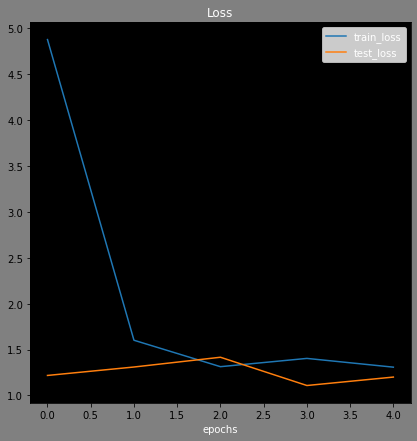

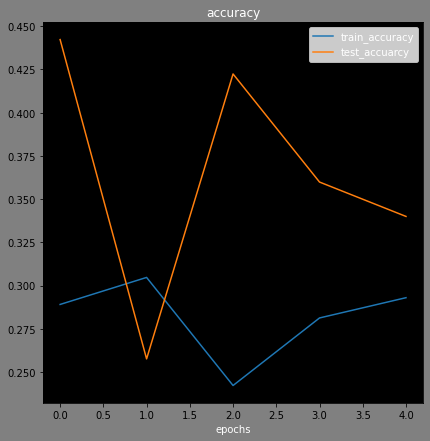

In [79]:
utils.plot_loss_curves(results)

In [80]:
import torch
import torchvision

In [81]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [82]:
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False
    
utils.set_seeds()
pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


  0%|          | 0.00/330M [00:00<?, ?B/s]

In [83]:
summary(model=pretrained_vit,
        input_size=(32, 3, 224, 224),
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=15,
        row_settings=['var_names'])

Layer (type (var_name))                                      Input Shape     Output Shape    Param #         Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224] [32, 3]         768             Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224] [32, 768, 14, 14] (590,592)       False
├─Encoder (encoder)                                          [32, 197, 768]  [32, 197, 768]  151,296         False
│    └─Dropout (dropout)                                     [32, 197, 768]  [32, 197, 768]  --              --
│    └─Sequential (layers)                                   [32, 197, 768]  [32, 197, 768]  --              False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]  [32, 197, 768]  (7,087,872)     False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]  [32, 197, 768]  (7,087,872)     False
│    │    └─EncoderBlock (encoder_layer_2)                   [32, 197, 

In [84]:
image_path = utils.download_data(source='https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip',
                                 destination='pizza_steak_sushi')

image_path

PosixPath('data/pizza_steak_sushi')

In [85]:
train_dir = image_path / 'train'
test_dir = image_path / 'test'

In [86]:
pretrained_vit_transforms = pretrained_vit_weights.transforms()
pretrained_vit_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [87]:
BATCH_SIZE = 32

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=pretrained_vit_transforms,
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f386e607280>,
 ['pizza', 'steak', 'sushi'])

In [88]:
from going_modular import engine

optimizer = torch.optim.Adam(params=pretrained_vit.parameters(),
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

utils.set_seeds()
pretrained_vit_results = engine.train(model=pretrained_vit,
                                      train_dataloader=train_dataloader,
                                      test_dataloader=test_dataloader,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 |Train loss: 0.7663 |Train acc: 0.7188 |Test loss: 0.5210 |Test acc: 0.8968
Epoch: 2 |Train loss: 0.3467 |Train acc: 0.9414 |Test loss: 0.2671 |Test acc: 0.9583
Epoch: 3 |Train loss: 0.2308 |Train acc: 0.9492 |Test loss: 0.2084 |Test acc: 0.9176
Epoch: 4 |Train loss: 0.1544 |Train acc: 0.9648 |Test loss: 0.2274 |Test acc: 0.9176
Epoch: 5 |Train loss: 0.1329 |Train acc: 0.9648 |Test loss: 0.1601 |Test acc: 0.9583
Epoch: 6 |Train loss: 0.1136 |Train acc: 0.9766 |Test loss: 0.1526 |Test acc: 0.9583
Epoch: 7 |Train loss: 0.1466 |Train acc: 0.9766 |Test loss: 0.1624 |Test acc: 0.9384
Epoch: 8 |Train loss: 0.0837 |Train acc: 0.9805 |Test loss: 0.1650 |Test acc: 0.9176
Epoch: 9 |Train loss: 0.0837 |Train acc: 0.9805 |Test loss: 0.1538 |Test acc: 0.9375
Epoch: 10 |Train loss: 0.0687 |Train acc: 0.9883 |Test loss: 0.2205 |Test acc: 0.9176


<Figure size 1080x504 with 0 Axes>

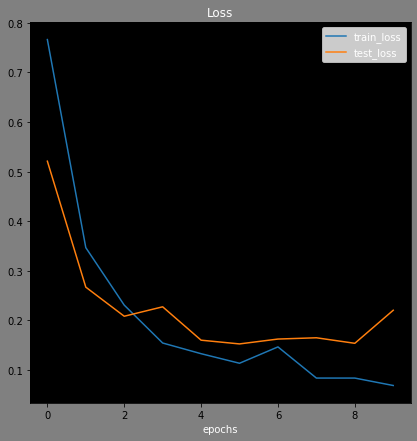

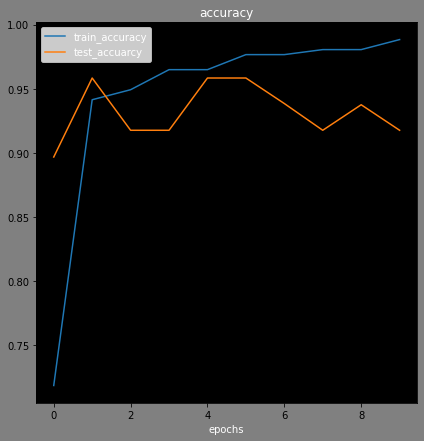

In [89]:
from going_modular import utils

utils.plot_loss_curves(pretrained_vit_results)

In [90]:
utils.save_model(model=pretrained_vit,
                 target_dir='models',
                 model_name='08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth')

[INFO] Saving model to: models/08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth


In [91]:
from pathlib import Path

pretrained_vit_model_size = Path('models/08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth').stat().st_size // (1024*1024)
print(f'Pretrained ViT feature extractor model size: {pretrained_vit_model_size} MB')

Pretrained ViT feature extractor model size: 327 MB


Image already exist


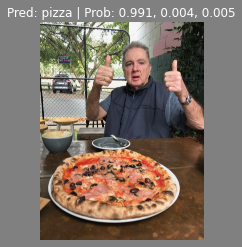

In [92]:
import requests

from going_modular import predictionsss

custom_image_path = image_path / 'img.jpg'

if not custom_image_path.is_file():
    with open(custom_image_path, 'wb') as f:
        request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg')
        print('Downloading')
        f.write(request.content)
else:
    print('Image already exist')

predictionsss.pred_and_plot_image(model=pretrained_vit,
                    image_path=custom_image_path,
                    image_size=(224,224),
                    class_names=class_names)

In [93]:
###############


# EXXRCS 1 #


###############

In [94]:
class ViT_ex_mod(nn.Module):
    def __init__(self,
                 img_size:int=224,
                 in_channels:int=3,
                 patch_size:int=16,
                 num_transformer_layers:int=12,
                 embedding_dim:int=768,
                 mlp_size:int=3072,
                 num_heads:int=12,
                 attn_dropout:int=0,
                 mlp_dropout:int=0.1,
                 embedding_dropout:int=0.1,
                 num_classes:int=1000):
        super().__init__()
        
        assert img_size % patch_size == 0, f'Image size must ne devisible by patch size'
        
        self.num_patches = (img_size * img_size) // patch_size**2
        
        self.class_embedding = nn.Parameter(data= torch.randn(1,1, embedding_dim),
                                            requires_grad=True)
        
        self.position_embedding = nn.Parameter(data= torch.randn(1,self.num_patches+1, embedding_dim),
                                            requires_grad=True)
        
        self.embedding_dropout = nn.Dropout(p=embedding_dropout)
        
        self.patch_embedding = PatchEmbedding(in_channels=in_channels,
                                              patch_size=patch_size,
                                              embedding_dim=embedding_dim)
        
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer=nn.TransformerEncoderLayer(d_model=embedding_dim,
                                                                                                  nhead=num_heads,
                                                                                                  dim_feedforward=mlp_size,
                                                                                                  activation="gelu",
                                                                                                  batch_first=True,
                                                                                                  norm_first=True), # Create a single Transformer Encoder Layer
                                                         num_layers=num_transformer_layers) # Stack it N times
        
        self.classifier = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            nn.Linear(in_features=embedding_dim,
                      out_features=num_classes))
            
    def forward(self, x):

        batch_size = x.shape[0]

        class_token = self.class_embedding.expand(batch_size, -1, -1)

        x = self.patch_embedding(x)

        x = torch.cat((class_token, x), dim=1)

        x = self.position_embedding + x

        x = self.embedding_dropout(x)

        x = self.transformer_encoder(x)

        x = self.classifier(x[:,0])

        return x

In [95]:
utils.set_seeds()

random_image_tensor = torch.randn(1, 3, 224, 224)

vit_mod = ViT_ex_mod(num_classes=len(class_names))

In [96]:
utils.set_seeds()

random_image_tensor = torch.randn(1, 3, 224, 224)

vit = ViT(num_classes=len(class_names))

In [97]:
summary(model=vit_mod,
        input_size=(32, 3, 224, 224))

Layer (type:depth-idx)                        Output Shape              Param #
ViT_ex_mod                                    [32, 3]                   152,064
├─PatchEmbedding: 1-1                         [32, 196, 768]            --
│    └─Conv2d: 2-1                            [32, 768, 14, 14]         590,592
│    └─Flatten: 2-2                           [32, 768, 196]            --
├─Dropout: 1-2                                [32, 197, 768]            --
├─TransformerEncoder: 1-3                     [32, 197, 768]            --
│    └─ModuleList: 2-3                        --                        --
│    │    └─TransformerEncoderLayer: 3-1      [32, 197, 768]            7,087,872
│    │    └─TransformerEncoderLayer: 3-2      [32, 197, 768]            7,087,872
│    │    └─TransformerEncoderLayer: 3-3      [32, 197, 768]            7,087,872
│    │    └─TransformerEncoderLayer: 3-4      [32, 197, 768]            7,087,872
│    │    └─TransformerEncoderLayer: 3-5      [32, 197, 7

In [98]:
summary(model=vit,
        input_size=(32, 3, 224, 224))

Layer (type:depth-idx)                             Output Shape              Param #
ViT                                                [32, 3]                   152,064
├─PatchEmbedding: 1-1                              [32, 196, 768]            --
│    └─Conv2d: 2-1                                 [32, 768, 14, 14]         590,592
│    └─Flatten: 2-2                                [32, 768, 196]            --
├─Dropout: 1-2                                     [32, 197, 768]            --
├─Sequential: 1-3                                  [32, 197, 768]            --
│    └─TransformerEncoderBlock: 2-3                [32, 197, 768]            --
│    │    └─MultiheadSelfAttentionBlock: 3-1       [32, 197, 768]            2,363,904
│    │    └─MLPBlock: 3-2                          [32, 197, 768]            4,723,968
│    └─TransformerEncoderBlock: 2-4                [32, 197, 768]            --
│    │    └─MultiheadSelfAttentionBlock: 3-3       [32, 197, 768]            2,363,904
│   

In [125]:
%%writefile vit8.py
import torch
from torch import nn 

class PatchEmbedding(nn.Module):
    """ Turns a 2D input image into a 1D sequence learnable embedding vector.
    
    Args:
        in_channels (int): Number of color channels fot the input images. Defaults to 3.
        patch_size (int): Size of patches to convert input image into. Defaults to 16.
        embedding_dim (int): Size of embedding to turn image into. Defaults to 768 """
    
    def __init__(self,
                 in_channels:int=3,
                 patch_size:int=16,
                 embedding_dim:int=768):
        super().__init__()
        
        self.patch_size = patch_size
        
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                out_channels=embedding_dim,
                                kernel_size=patch_size,
                                stride=patch_size,
                                padding=0)
        
        self.flatten = nn.Flatten(start_dim=2,
                                  end_dim=3)
    
    def forward(self, x):
        image_resolution = x.shape[-1]
        assert image_resolution % self.patch_size == 0, f'Input image size must be divisible by patch size, image shape: {image_resolution}, patch size: {patch_size}'
        
        x_patched = self.patcher(x)
        x_flattened = self.flatten(x_patched)
        
        return x_flattened.permute(0,2,1)

class ViT_ex_imp8(nn.Module):
    def __init__(self,
                 img_size:int=224,
                 in_channels:int=3,
                 patch_size:int=16,
                 num_transformer_layers:int=12,
                 embedding_dim:int=768,
                 mlp_size:int=3072,
                 num_heads:int=12,
                 attn_dropout:int=0,
                 mlp_dropout:int=0.1,
                 embedding_dropout:int=0.1,
                 num_classes:int=1000):
        super().__init__()
        
        assert img_size % patch_size == 0, f'Image size must ne devisible by patch size'
        
        self.num_patches = (img_size * img_size) // patch_size**2
        
        self.class_embedding = nn.Parameter(data= torch.randn(1,1, embedding_dim),
                                            requires_grad=True)
        
        self.position_embedding = nn.Parameter(data= torch.randn(1,self.num_patches+1, embedding_dim),
                                            requires_grad=True)
        
        self.embedding_dropout = nn.Dropout(p=embedding_dropout)
        
        self.patch_embedding = PatchEmbedding(in_channels=in_channels,
                                              patch_size=patch_size,
                                              embedding_dim=embedding_dim)
        
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer=nn.TransformerEncoderLayer(d_model=embedding_dim,
                                                                                                  nhead=num_heads,
                                                                                                  dim_feedforward=mlp_size,
                                                                                                  activation="gelu",
                                                                                                  batch_first=True,
                                                                                                  norm_first=True), # Create a single Transformer Encoder Layer
                                                         num_layers=num_transformer_layers) # Stack it N times
        
        self.classifier = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            nn.Linear(in_features=embedding_dim,
                      out_features=num_classes))
            
    def forward(self, x):

        batch_size = x.shape[0]

        class_token = self.class_embedding.expand(batch_size, -1, -1)

        x = self.patch_embedding(x)

        x = torch.cat((class_token, x), dim=1)

        x = self.position_embedding + x

        x = self.embedding_dropout(x)

        x = self.transformer_encoder(x)

        x = self.classifier(x[:,0])

        return x

Writing vit8.py


In [123]:
!python vit8.py

In [126]:
from vit8 import ViT_ex_imp8

imported_ex_vit8 = ViT_ex_imp8()
summary(model=imported_ex_vit8,
        input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                        Output Shape              Param #
ViT_ex_imp8                                   [1, 1000]                 152,064
├─PatchEmbedding: 1-1                         [1, 196, 768]             --
│    └─Conv2d: 2-1                            [1, 768, 14, 14]          590,592
│    └─Flatten: 2-2                           [1, 768, 196]             --
├─Dropout: 1-2                                [1, 197, 768]             --
├─TransformerEncoder: 1-3                     [1, 197, 768]             --
│    └─ModuleList: 2-3                        --                        --
│    │    └─TransformerEncoderLayer: 3-1      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-2      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-3      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-4      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-5      [1, 197, 76

In [127]:
from going_modular import utils

utils.set_seeds()

vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
pretrained_vit = torchvision.models.vit_b_16(weights=vit_weights)

for param in pretrained_vit.parameters():
    param.requires_grad = False

embedding_dim = 768 
utils.set_seeds()
pretrained_vit.heads = nn.Sequential(
    nn.LayerNorm(normalized_shape=embedding_dim),
    nn.Linear(in_features=embedding_dim,
              out_features=len(class_names)))

summary(model=pretrained_vit,
        input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                        Output Shape              Param #
VisionTransformer                             [1, 3]                    768
├─Conv2d: 1-1                                 [1, 768, 14, 14]          (590,592)
├─Encoder: 1-2                                [1, 197, 768]             151,296
│    └─Dropout: 2-1                           [1, 197, 768]             --
│    └─Sequential: 2-2                        [1, 197, 768]             --
│    │    └─EncoderBlock: 3-1                 [1, 197, 768]             (7,087,872)
│    │    └─EncoderBlock: 3-2                 [1, 197, 768]             (7,087,872)
│    │    └─EncoderBlock: 3-3                 [1, 197, 768]             (7,087,872)
│    │    └─EncoderBlock: 3-4                 [1, 197, 768]             (7,087,872)
│    │    └─EncoderBlock: 3-5                 [1, 197, 768]             (7,087,872)
│    │    └─EncoderBlock: 3-6                 [1, 197, 768]             (7,087,872)
│    │    └─EncoderBlock: 3-

In [132]:
from going_modular import data_setup

data_20_percent_path = utils.download_data(source='https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip',
                                     destination='pizza_steak_sushi_20_perc')

train_dir_20_perc = data_20_percent_path / 'train'

vit_transforms = vit_weights.transforms()
train_dataloader_20_perc, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir_20_perc,
                                                                                       test_dir=test_dir,
                                                                                       transform=vit_transforms,
                                                                                       batch_size=32)


Unzipping pizza_steak_sushi_20_percent.zip
Deleting


In [137]:
print(f'Num of batches prev dataloader: {len(train_dataloader)}'\
      f'\nNum of batches new dataloader: {len(train_dataloader_20_perc)}')

Num of batches prev dataloader: 8
Num of batches new dataloader: 15


In [138]:
from going_modular import engine

optimizer = torch.optim.Adam(params=pretrained_vit.parameters(),
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

utils.set_seeds()
pretrained_vit_results = engine.train(model=pretrained_vit,
                                      train_dataloader=train_dataloader_20_perc,
                                      test_dataloader=test_dataloader,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 |Train loss: 0.6443 |Train acc: 0.7521 |Test loss: 0.2235 |Test acc: 0.9072
Epoch: 2 |Train loss: 0.1738 |Train acc: 0.9396 |Test loss: 0.1673 |Test acc: 0.9688
Epoch: 3 |Train loss: 0.1215 |Train acc: 0.9583 |Test loss: 0.1627 |Test acc: 0.9280
Epoch: 4 |Train loss: 0.1005 |Train acc: 0.9688 |Test loss: 0.2482 |Test acc: 0.9280
Epoch: 5 |Train loss: 0.0799 |Train acc: 0.9771 |Test loss: 0.1537 |Test acc: 0.9479
Epoch: 6 |Train loss: 0.0705 |Train acc: 0.9833 |Test loss: 0.1624 |Test acc: 0.9583
Epoch: 7 |Train loss: 0.0624 |Train acc: 0.9875 |Test loss: 0.1852 |Test acc: 0.9280
Epoch: 8 |Train loss: 0.0492 |Train acc: 0.9896 |Test loss: 0.1648 |Test acc: 0.9479
Epoch: 9 |Train loss: 0.0422 |Train acc: 0.9938 |Test loss: 0.1678 |Test acc: 0.9479
Epoch: 10 |Train loss: 0.0347 |Train acc: 0.9979 |Test loss: 0.3012 |Test acc: 0.9280


<Figure size 1080x504 with 0 Axes>

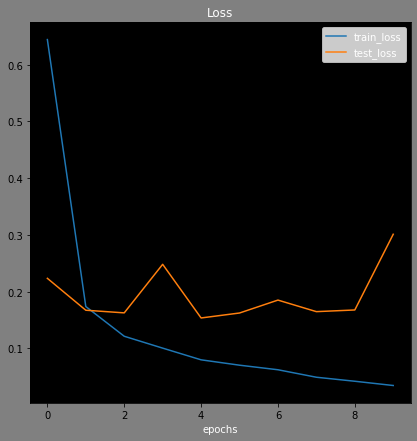

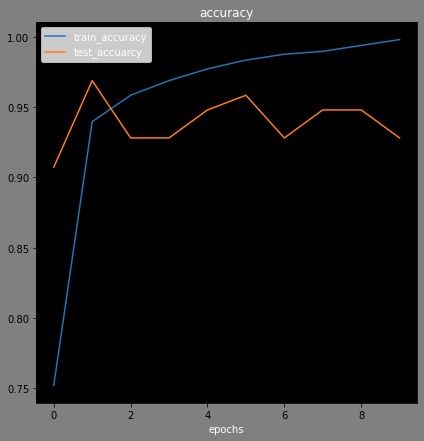

In [139]:
from going_modular import utils

utils.plot_loss_curves(pretrained_vit_results)

In [155]:
from going_modular import utils

utils.set_seeds()

vit_SWAG_weights = torchvision.models.ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1.DEFAULT
pretrained_SWAG_vit = torchvision.models.vit_b_16(weights=vit_SWAG_weights)

for param in pretrained_SWAG_vit.parameters():
    param.requires_grad = False

embedding_dim = 768 
utils.set_seeds()
pretrained_SWAG_vit.heads = nn.Sequential(
    nn.LayerNorm(normalized_shape=embedding_dim),
    nn.Linear(in_features=embedding_dim,
              out_features=len(class_names)))

In [156]:
vit_SWAG_transforms = vit_weights.transforms(resize_size=(384, 384))
                                             
train_dataloader_SWAG_20_perc, test_SWAG_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir_20_perc,
                                                                                       test_dir=test_dir,
                                                                                       transform=vit_SWAG_transforms,
                                                                                       batch_size=32)


In [157]:
from going_modular import engine

optimizer = torch.optim.Adam(params=pretrained_SWAG_vit.parameters(),
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

utils.set_seeds()
pretrained_vit_results = engine.train(model=pretrained_SWAG_vit,
                                      train_dataloader=train_dataloader_SWAG_20_perc,
                                      test_dataloader=test_SWAG_dataloader,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 |Train loss: 0.6050 |Train acc: 0.7479 |Test loss: 0.2120 |Test acc: 0.9489
Epoch: 2 |Train loss: 0.1889 |Train acc: 0.9313 |Test loss: 0.1362 |Test acc: 0.9688
Epoch: 3 |Train loss: 0.1362 |Train acc: 0.9500 |Test loss: 0.1293 |Test acc: 0.9792
Epoch: 4 |Train loss: 0.1084 |Train acc: 0.9604 |Test loss: 0.2360 |Test acc: 0.9593
Epoch: 5 |Train loss: 0.0955 |Train acc: 0.9708 |Test loss: 0.1227 |Test acc: 0.9688
Epoch: 6 |Train loss: 0.0835 |Train acc: 0.9833 |Test loss: 0.1229 |Test acc: 0.9688
Epoch: 7 |Train loss: 0.0649 |Train acc: 0.9938 |Test loss: 0.1422 |Test acc: 0.9688
Epoch: 8 |Train loss: 0.0606 |Train acc: 0.9958 |Test loss: 0.1269 |Test acc: 0.9688
Epoch: 9 |Train loss: 0.0500 |Train acc: 1.0000 |Test loss: 0.1340 |Test acc: 0.9688
Epoch: 10 |Train loss: 0.0410 |Train acc: 1.0000 |Test loss: 0.2630 |Test acc: 0.9489


<Figure size 1080x504 with 0 Axes>

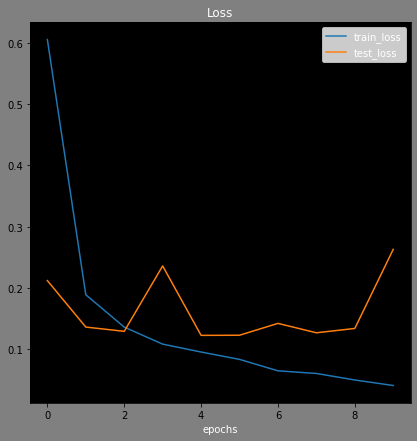

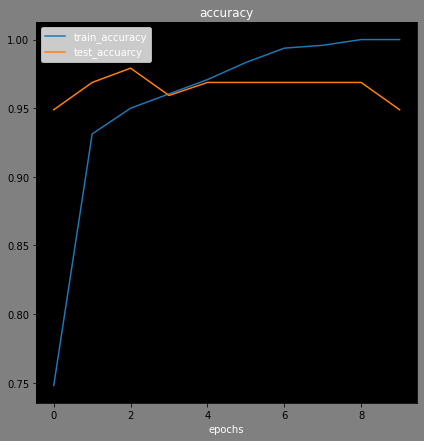

In [158]:
utils.plot_loss_curves(pretrained_vit_results)